<a href="https://colab.research.google.com/github/swapnalisingh13/Reinforcement_L/blob/main/Lab1_Armed_bandit_RL_565.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ad_slots = ['Top_banner', 'Sidebar', 'Footer', 'Pop-up']

#initializing clicks and views to slot 0
clicks = {}
views = {}

for slot in ad_slots:
    clicks[slot] = 0
    views[slot] = 0

# Epsilon value (90% exploitation, 10% exploration)
epsilon = 0.1

# Total No of impressions (views)
total_impressions = 1000

# true click-through rates for each ad slot
true_ctr = {
    'Top_banner': 0.07,  # 7% chance of click
    'Sidebar': 0.05,     # 5% chance of click
    'Footer': 0.01,      # 1% chance of click
    'Pop-up': 0.03       # 3% chance of click
}

In [ ]:
# Function to simulate a user click based on the true CTR
def user_click(slot):
    return random.random() < true_ctr[slot]

# Epsilon-greedy algorithm to select an ad slot
def select_ad_slot():
    if random.random() < epsilon:
        # Exploration- Select a random ad slot
        return random.choice(ad_slots)
    else:
        # Exploitation- Select the ad slot with the highest estimated CTR
        estimated_ctr = {slot: (clicks[slot] / views[slot]) if views[slot] > 0 else 0 for slot in ad_slots}
        return max(estimated_ctr, key=estimated_ctr.get)

In [ ]:
rewards = []  # To track the reward over time
choices = {slot: 0 for slot in ad_slots}

for impression in range(total_impressions):
    # selection using the epsilon-greedy algorithm
    selected_slot = select_ad_slot()

    #  displaying the ad in the selected slot
    user_clicked = user_click(selected_slot)

    # Update the counts of views and clicks
    views[selected_slot] += 1
    if user_clicked:
        clicks[selected_slot] += 1

    # Record rewards and choices
    rewards.append(1 if user_clicked else 0)
    choices[selected_slot] += 1

In [ ]:
estimated_ctr = {slot: (clicks[slot] / views[slot]) if views[slot] > 0 else 0 for slot in ad_slots}
print("Estimated CTRs for each ad slot after", total_impressions, "impressions:")
for slot in ad_slots:
    print(f"{slot}: {estimated_ctr[slot]:.4f}")

# Print the true CTRs for comparison
print("\nTrue CTRs:")
for slot in ad_slots:
    print(f"{slot}: {true_ctr[slot]:.4f}")

Estimated CTRs for each ad slot after 1000 impressions:
Top_banner: 0.0761
Sidebar: 0.0688
Footer: 0.0000
Pop-up: 0.0513

True CTRs:
Top_banner: 0.0700
Sidebar: 0.0500
Footer: 0.0100
Pop-up: 0.0300


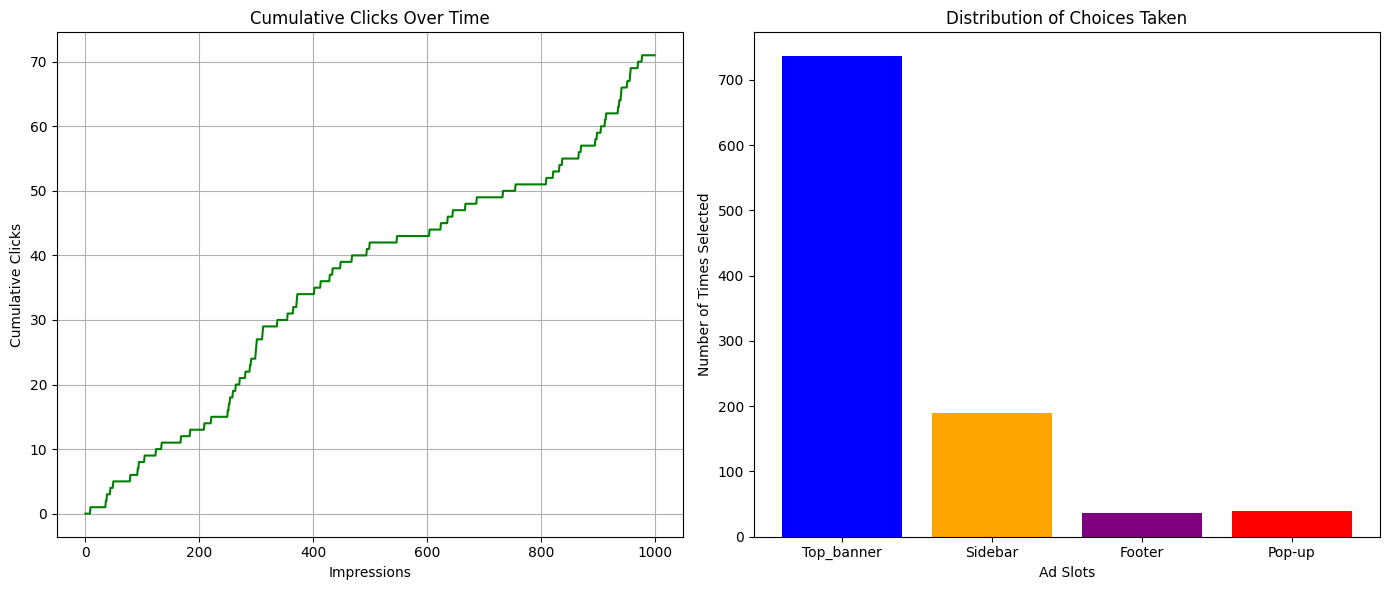

In [ ]:
# Plotting the cumulative reward over time (line graph)
cumulative_rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]

plt.figure(figsize=(14, 6))

# Plot the cummalative reward line graph
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards, label='Cumulative Clicks', color='green')
plt.title('Cumulative Clicks Over Time')
plt.xlabel('Impressions')
plt.ylabel('Cumulative Clicks')
plt.grid(True)

# Plot the bar chart for distribution of ad slot choices
plt.subplot(1, 2, 2)
plt.bar(choices.keys(), choices.values(), color=['blue', 'orange', 'purple', 'red'])
plt.title('Distribution of Choices Taken')
plt.xlabel('Ad Slots')
plt.ylabel('Number of Times Selected')

plt.tight_layout()
plt.show()